# Predict the prices of stocks using the “Google stock price” data.
<b> The stock market is known for being volatile, dynamic, and nonlinear. Accurate stock price prediction is extremely challenging because of multiple (macro and micro) factors, such as politics, global economic conditions, unexpected events, a company’s financial performance, and so on. 

<b> But, all of this also means that there’s a lot of data to find patterns in. So, financial analysts, researchers, and data scientists keep exploring analytics techniques to detect stock market trends. This gave rise to the concept of algorithmic trading, which uses automated, pre-programmed trading strategies to execute orders.

<b> In this article, we’ll be using the machine learning algorithms to predict stock movements. Predicting stock prices with an LSTM model. Based on the stock price data between 2012 and 2016, we will predict the stock prices of 2017.

## 1. Import the required libraries

In [1]:
# Importing the libraries
import numpy as np                 # allow to make arrays
import matplotlib.pyplot as plt    # visualize results on charts 
import pandas as pd                # import dataset and manage easily

## 2. Import the training dataset
<b> Load the dataset by using read_csv() to read the dataset and save it to the 'dataset_train' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

# Display the first 5 lines using the head() method.
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


<b> Let’s have a look at data dimensionality.

In [3]:
dataset_train.shape

(1258, 6)

<b> From the output, we can see that the table contains 1258 rows and 6 columns.


## 3. Data Preprocessing

### 3.1 Data Cleaning
<b> Checking the Empty cells / Missing values :

- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [4]:
# Check the missing values records.
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<b> In the above, we can see that there is no missing values.

<b> Now checking the Duplicate records :

In [5]:
dataset_train.duplicated().sum()

0

<b> In the above, we can see that there is no duplicate values.

<b> Here we are going to predict the prices of stocks based on 'Open' variable only. So extracting the 'Open' variable & storing in the 'training_set' object and need to make into numpy arrays because only nump arrays can be input values in keras.

In [6]:
# need to make into numpy arrays because only nump arrays can be input values in keras
training_set = dataset_train.iloc[:, 1:2].values 

# Display the result
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### 3.2 Perform feature scaling to transform the data

In [7]:
# Feature Scaling
# 2 ways: take obs- min ofstock prices/max of stock prices- min of stock prices
# using normalization instead of standardisation- look at meaning
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)   # fit (gets min and max on data to apply formula) 
                                                       # tranform(compute scale stock prices to each formula)
    
# Display the result
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### 3.3 Create a data structure with 60-time steps and 1 output

In [8]:
'''Creating a data structure with 60 timesteps and 1 output, 60 times steps- at each time t and look at 
   60 previous time steps, then make new prediction, 1 time step leads to overfitting, 20 is still too low, 
   60 previous financial days- in 3 months'''

X_train = []      # Empty 'X_train' list
y_train = []      # Empty 'y_train' list

for i in range(60, 1258):                               # upper bound is number of values 
  X_train.append(training_set_scaled[i-60:i, 0])        # takes 60 previous stock prices from 60 past stock prices
  y_train.append(training_set_scaled[i, 0])             # contains stock price learned to predict 
X_train, y_train = np.array(X_train), np.array(y_train) # make into numpy arrays 



In [9]:
# Reshaping- add dimension in numpy array 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # adds dimension in numpy array

## 4. Building the RNN stacked LSTM
### Import Keras library and its packages

In [12]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialize the RNN

In [13]:
# Initialising the RNN
regressor = Sequential()

### Adding the first LSTM layer

In [14]:
# Adding the first LSTM layer and some Dropout regularisation
#dropout to prevent overfitting
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# regressor- object of sequential class, can add layers to networ.
# use lstm class and create object of lstm class- 3 args
# num of units, return sequences- set to true because is stacked lstms, and shape
# units- neurons in first layer. 50 in layers for high dimensionality, can capture upward and downward

regressor.add(Dropout(0.2))    # Dropping 20% neurons

### Adding the second LSTM layer

In [15]:
# Adding a second LSTM layer and some Dropout regularisation

'''total of 4 layers, simply need to copy, only change is input shape so dont need to specify that, 
   automatically recognised through input shape'''

regressor.add(LSTM(units = 50, return_sequences = True)) 

regressor.add(Dropout(0.2))     # Dropping 20% neurons

### Adding the third LSTM layer

In [16]:
# Adding a third LSTM layer and some Dropout regularisation
# same as second layer 
regressor.add(LSTM(units = 50, return_sequences = True))

regressor.add(Dropout(0.2))     # Dropping 20% neurons

### Adding the fourth LSTM layer

In [17]:
# Adding a fourth LSTM layer and some Dropout regularisation
# almost same, but return sequence is false because it is the last lstm layer (so it is removed becasue default is false)
regressor.add(LSTM(units = 50))

regressor.add(Dropout(0.2))     # Dropping 20% neurons

### Adding the output LSTM layer

In [18]:
# Adding the output layer
# add fully connected layer through dense class- dimesion/units/neurons is 1
regressor.add(Dense(units = 1))

### Compiling the RNN

In [19]:
# Compiling the RNN
# regressior because predicting continuous value, 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [20]:
# Fitting the RNN to the Training set
# have not made connection to training set, training will take place
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 129ms/step - loss: 0.0350
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0058
Epoch 4/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0053
Epoch 7/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0038
Epoch 13/100

38/38 [==============================] - 5s 120ms/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0012


## 5. Making the predictions and Evaluating the results
### Prediction on train dataset

In [21]:
pred = regressor.predict(X_train)

38/38 [==============================] - 4s 40ms/step


### Evaluating the RNN 

In [22]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train, pred))
rmse

0.022828240066915473

## 6. Making the predictions and visualising the results
### Getting the real stock price of 2017

In [23]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Get the predicted stock price for 2017

In [24]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values # getting input of each previous financial days
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 56ms/step


### Visualize the results of predicted and real stock price

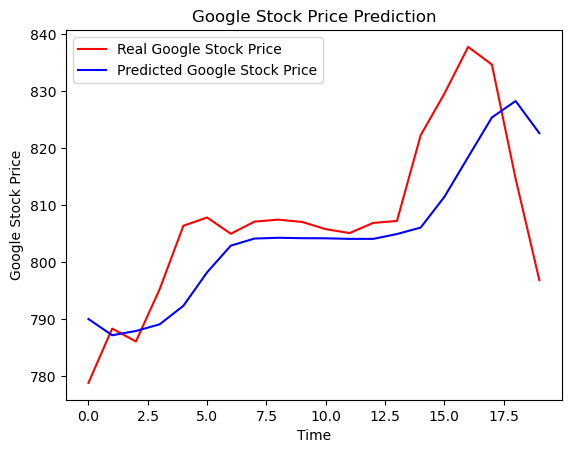

In [25]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()